In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
import os
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import json
import pickle
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from scipy import stats
device = torch.device('cuda:0')

In [4]:
# Load the class index file
with open('/content/gdrive/MyDrive/CCM1016_Project/imagenet_class_index.json', 'r') as f:
    class_idx = json.load(f)

# Creat a dict mapping index to label
idx2label = {class_idx[str(k)][0]:class_idx[str(k)][1] for k in range(len(class_idx))}

# Create a dict mapping category index ("nxxxxxxxx") to class index (0,1,2,3,...)
idx2number = {class_idx[str(k)][0]:k for k in range(len(class_idx))}

## Load word embeddings for each domain from pickle

In [5]:
# Load the dictionary from a pickle file
with open('/content/gdrive/MyDrive/CCM1016_Project/word_embedding.pickle', 'rb') as f:
    word_embedding = pickle.load(f)

In [6]:
# Get the keys for each domain
animals20 = list(word_embedding.keys())[0:20]
vehicles20 = list(word_embedding.keys())[20:40]
fruitVeg20 = list(word_embedding.keys())[40:60]
word_list_full = animals20 + vehicles20 + fruitVeg20

animal_embeddings = [word_embedding[key] for key in animals20]
vehicle_embeddings = [word_embedding[key] for key in vehicles20]
fruitVeg_embeddings = [word_embedding[key] for key in fruitVeg20]
all_embeddings = [word_embedding[key] for key in word_list_full]

## Word Clustering

### Hierarchical Clustering

In [ ]:
# Define a distance metric
# distance_metric = cosine_similarity

# Calculate pairwise distances
# distances = distance_metric(animal_embeddings)

# Perform hierarchical clustering
# Z = linkage(distances, method='ward')

# Define the labels to show on the x-axis
# labels = animals20

# fig, ax = plt.subplots(figsize=(15,10))

# Plot dendrogram with custom labels
# dendrogram(Z, labels=labels, leaf_font_size=10, leaf_rotation=90)

# ax.set_xlabel("Animal Names")

# plt.title('Hierarchical Clustering Word Embedding Visualization - Animal')
# plt.show()

In [7]:
# Define a function to assign colors to each label
label_color = {}
for label in word_list_full:
    if label in animals20:
        label_color[label] = 'blueviolet'
    elif label in vehicles20:
        label_color[label] = 'orange'
    elif label in fruitVeg20:
        label_color[label] = 'limegreen'
    else:
        label_color[label] = 'black'

In [110]:
# print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


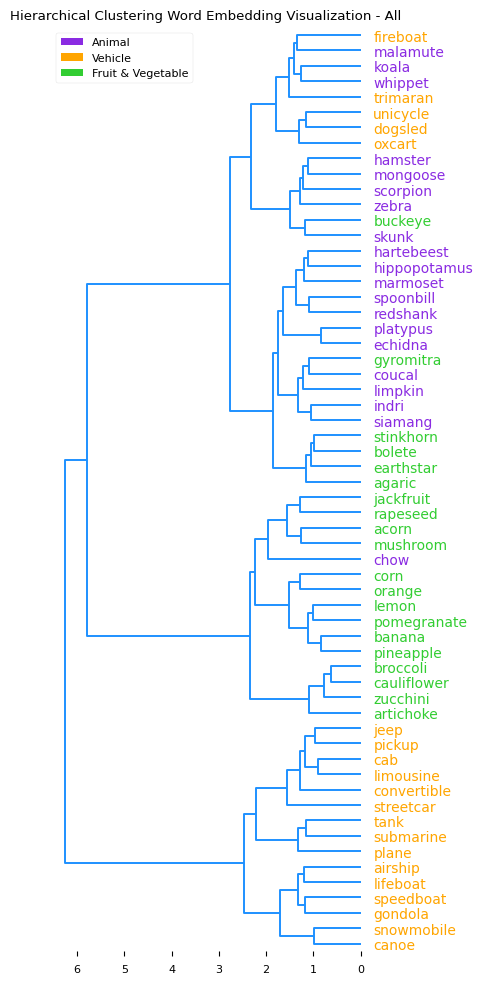

In [14]:
# Define a distance metric
distance_metric = cosine_similarity

# Calculate pairwise distances
distances = distance_metric(all_embeddings)

# Perform hierarchical clustering
Z = linkage(distances, method='ward')
# print(Z)

# Define the labels to show on the x-axis
labels = word_list_full
# The order of the labels corresponds to the order of the embeddings in the all_embeddings array.

fig, ax = plt.subplots(figsize=(4,12))
plt.style.use('seaborn-v0_8-paper')

# Plot dendrogram with custom labels
dendrogram(Z, labels=labels, leaf_font_size=10, leaf_rotation=0, orientation='left', link_color_func=lambda k: 'dodgerblue')

xlbls = ax.get_ymajorticklabels()
for i in range(len(xlbls)):
    xlbls[i].set_color(label_color[xlbls[i].get_text()])

# create patch objects for each color and domain pair
domain_color = {'Animal': 'blueviolet', 'Vehicle': 'orange', 'Fruit & Vegetable': 'limegreen'}
legend_patches = [Patch(facecolor=color, label=label) for label, color in domain_color.items()]

# add the legend to the plot
plt.legend(handles=legend_patches, loc='upper left')

plt.title('Hierarchical Clustering Word Embedding Visualization - All')

# Remove axis spines
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

# dendrogram(Z, no_plot=True)['leaves_color_list']

### TSNE

In [ ]:
# Create a TSNE object and fit_transform the embeddings
# tsne = TSNE(n_components=2, perplexity=3, random_state=42)
# embeddings_2d = tsne.fit_transform(np.array(animal_embeddings))

# Plot the 2D embeddings with labels
# fig, ax = plt.subplots(figsize=(15, 10))
# ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c='red')
# for i, name in enumerate(animals20):
#     ax.annotate(name, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
# plt.title('t-SNE 2D Word Embedding Visualization - Animal')
# plt.show()

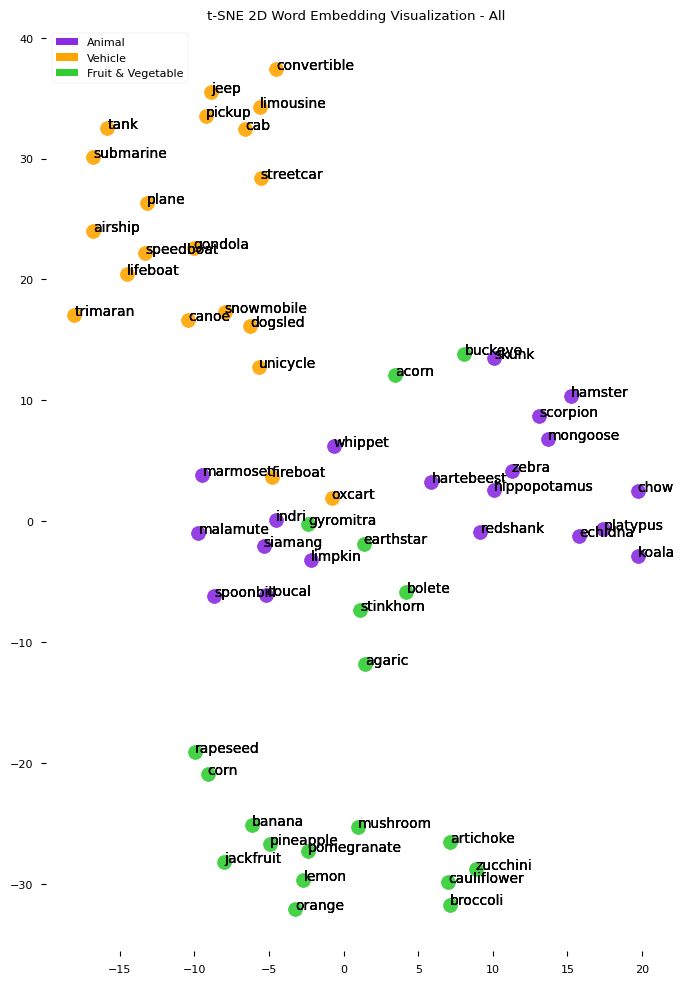

In [18]:
# Define the colors for each label
colors = ['blueviolet', 'orange', 'limegreen']

# Create separate arrays for each group of embeddings, and assign unique integer labels to each group
animal_labels = np.zeros(len(animal_embeddings), dtype=int)
vehicle_labels = np.ones(len(vehicle_embeddings), dtype=int)
fruitVeg_labels = np.full(len(fruitVeg_embeddings), 2, dtype=int)

# Concatenate the arrays of labels for each group of embeddings into a single array
color_labels = np.concatenate((animal_labels, vehicle_labels, fruitVeg_labels))

# Create a TSNE object and fit_transform the embeddings
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
embeddings_2d = tsne.fit_transform(np.array(all_embeddings))

# Plot the 2D embeddings with labels
fig, ax = plt.subplots(figsize=(8, 12))
for i in range(len(colors)):
    # ax.scatter(embeddings_2d[color_labels == i, 0], embeddings_2d[color_labels == i, 1], c=colors[i])
    # for i, name in enumerate(word_list_full):
    #     ax.annotate(name, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
    ax.scatter(embeddings_2d[color_labels == i, 0], embeddings_2d[color_labels == i, 1], 
               c=colors[i], s=100, alpha=0.9, linewidth=0.5)
    for i, name in enumerate(word_list_full):
        ax.annotate(name, (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=10)

# add the legend to the plot
plt.legend(handles=legend_patches, loc='upper left')

# Remove the boundary around the plot
for spine in ax.spines.values():
    spine.set_color(None)
    spine.set_linewidth(0)

plt.title('t-SNE 2D Word Embedding Visualization - All')
plt.show()


## Load image embeddings

In [16]:
path = "/content/gdrive/MyDrive/CCM1016_Project/"
with open(path + 'output.pkl','rb') as f:
    outputs = pickle.load(f)
Animal_relu = outputs["Animal_relu"]
Animal_maxp = outputs["Animal_maxp"]
Vehicle_relu = outputs["Vehicle_relu"]
Vehicle_maxp = outputs["Vehicle_maxp"]
FV_relu = outputs["FV_relu"]
FV_maxp = outputs["FV_maxp"]

In [19]:
# get normalized image embeddings based on the domain and layer specified
# input
# domain: Animal_relu, layer: classifier.4
# output: dictionary: (key = category name (e.g. rabbit), value = normalized image embedding)
def getNormalizedEmbed(domain, layer):
    output = {}
    for category in domain:
        cateName = idx2label[category]
        rawEmbed = domain[category][layer]
        zScoredEmbed = stats.zscore(rawEmbed)
        output[cateName] = zScoredEmbed
    return output

ReLU & maxPooling layer names: \
ReLU: \
['features.1', 'features.3', 'features.6', 'features.8', 'features.11', 'features.13', 'features.15', 'features.18', 'features.20', 'features.22', 'features.25', 'features.27', 'features.29', 'classifier.1', 'classifier.4'] \
maxPooling: \
['features.4', 'features.9', 'features.16', 'features.23', 'features.30']

In [20]:
ani_fc2 = getNormalizedEmbed(Animal_relu, 'classifier.4')
veh_fc2 = getNormalizedEmbed(Vehicle_relu, 'classifier.4')
fv_fc2 = getNormalizedEmbed(FV_relu, 'classifier.4')

combined_fc2 = {}
combined_fc2.update(ani_fc2)
combined_fc2.update(veh_fc2)
combined_fc2.update(fv_fc2)

In [21]:
ani_mp5 = getNormalizedEmbed(Animal_maxp, 'features.30')
veh_mp5 = getNormalizedEmbed(Vehicle_maxp, 'features.30')
fv_mp5 = getNormalizedEmbed(FV_maxp, 'features.30')

combined_mp5 = {}
combined_mp5.update(ani_mp5)
combined_mp5.update(veh_mp5)
combined_mp5.update(fv_mp5)

In [22]:
ani_fc1 = getNormalizedEmbed(Animal_relu, 'classifier.1')
veh_fc1 = getNormalizedEmbed(Vehicle_relu, 'classifier.1')
fv_fc1 = getNormalizedEmbed(FV_relu, 'classifier.1')

combined_fc1 = {}
combined_fc1.update(ani_fc1)
combined_fc1.update(veh_fc1)
combined_fc1.update(fv_fc1)

## Image Clustering

### Hierarchical Clustering

In [1]:
def plot_dendro(image_embeddings, domain, layer):
    distance_metric = cosine_similarity
    distances = distance_metric(list(image_embeddings.values()))
    Z = linkage(distances, method='ward')
    labels = list(image_embeddings.keys())
    fig, ax = plt.subplots(figsize=(4, 12))
    dendrogram(Z, labels=labels, leaf_font_size=10, leaf_rotation=0, orientation='left', link_color_func=lambda k: 'dodgerblue')

    xlbls = ax.get_ymajorticklabels()
    for i in range(len(xlbls)):
        xlbls[i].set_color(label_color[xlbls[i].get_text()])
    
    legend_patches = [Patch(facecolor=color, label=label) for label, color in domain_color.items()]
    plt.legend(handles=legend_patches, loc='upper left')
    plt.title('Hierarchical Clustering Image Embedding Visualization - ' + domain + ' ' + layer)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.show()

In [ ]:
# plot_dendro(ani_fc2, "Animal", "FC2")
# plot_dendro(veh_fc2, "Vehicle", "FC2")
# plot_dendro(fv_fc2, "Fruits & Veggie", "FC2")

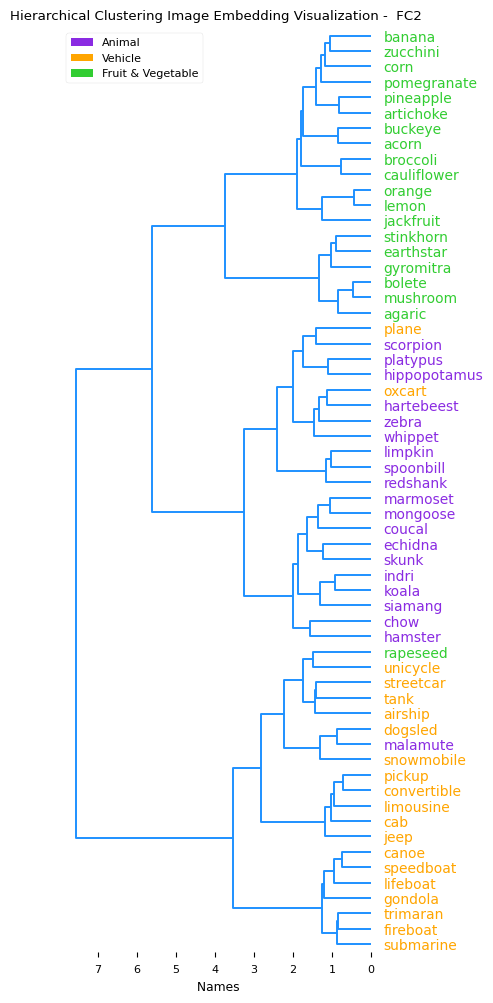

In [24]:
plot_dendro(combined_fc2, "", "FC2")

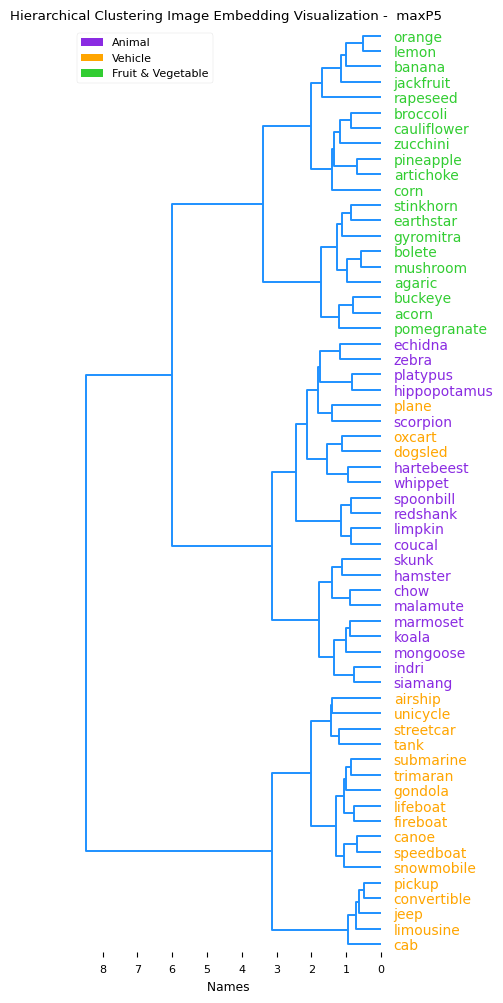

In [25]:
plot_dendro(combined_mp5, "", "maxP5")

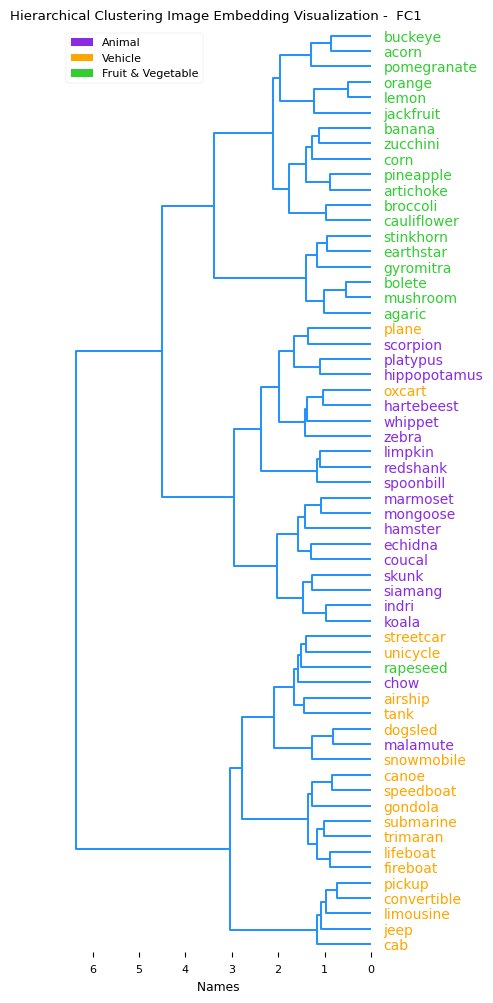

In [26]:
plot_dendro(combined_fc1, "", "FC1")

### TSNE

In [51]:
def plot_tsne(image_embeddings, layer):
    # Define the colors for each label
    colors = ['blueviolet', 'orange', 'limegreen']

    # Create separate arrays for each group of embeddings, and assign unique integer labels to each group
    animal_labels = np.zeros(len(animal_embeddings), dtype=int)
    vehicle_labels = np.ones(len(vehicle_embeddings), dtype=int)
    fruitVeg_labels = np.full(len(fruitVeg_embeddings), 2, dtype=int)

    # Concatenate the arrays of labels for each group of embeddings into a single array
    color_labels = np.concatenate((animal_labels, vehicle_labels, fruitVeg_labels))

    # Create a TSNE object and fit_transform the embeddings
    tsne = TSNE(n_components=2, perplexity=5, random_state=42)
    embeddings_2d = tsne.fit_transform(np.array(list(image_embeddings.values())))

    # Plot the 2D embeddings with labels
    fig, ax = plt.subplots(figsize=(12, 12))
    for i in range(len(colors)):
        # ax.scatter(embeddings_2d[color_labels == i, 0], embeddings_2d[color_labels == i, 1], c=colors[i])
        # for i, name in enumerate(list(image_embeddings.keys())):
        #     ax.annotate(name, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
        ax.scatter(embeddings_2d[color_labels == i, 0], embeddings_2d[color_labels == i, 1], 
               c=colors[i], s=100, alpha=0.9, linewidth=0.5)
        for i, name in enumerate(list(image_embeddings.keys())):
            ax.annotate(name, (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=8)
   
    # add the legend to the plot
    plt.legend(handles=legend_patches, loc='upper left')

    # Remove the boundary around the plot
    for spine in ax.spines.values():
        spine.set_color(None)
        spine.set_linewidth(0)

    plt.title('t-SNE 2D Image Embedding Visualization - ' + layer)
    plt.show()

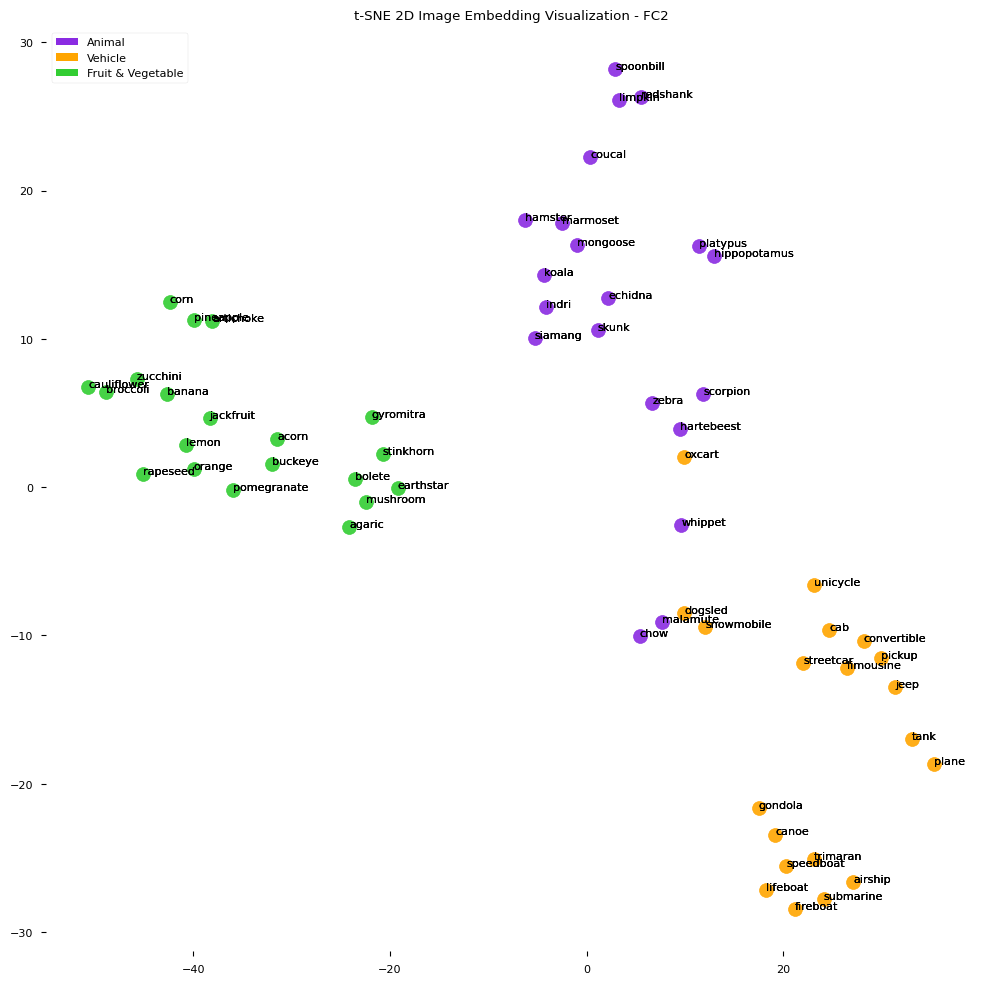

In [52]:
plot_tsne(combined_fc2, "FC2")

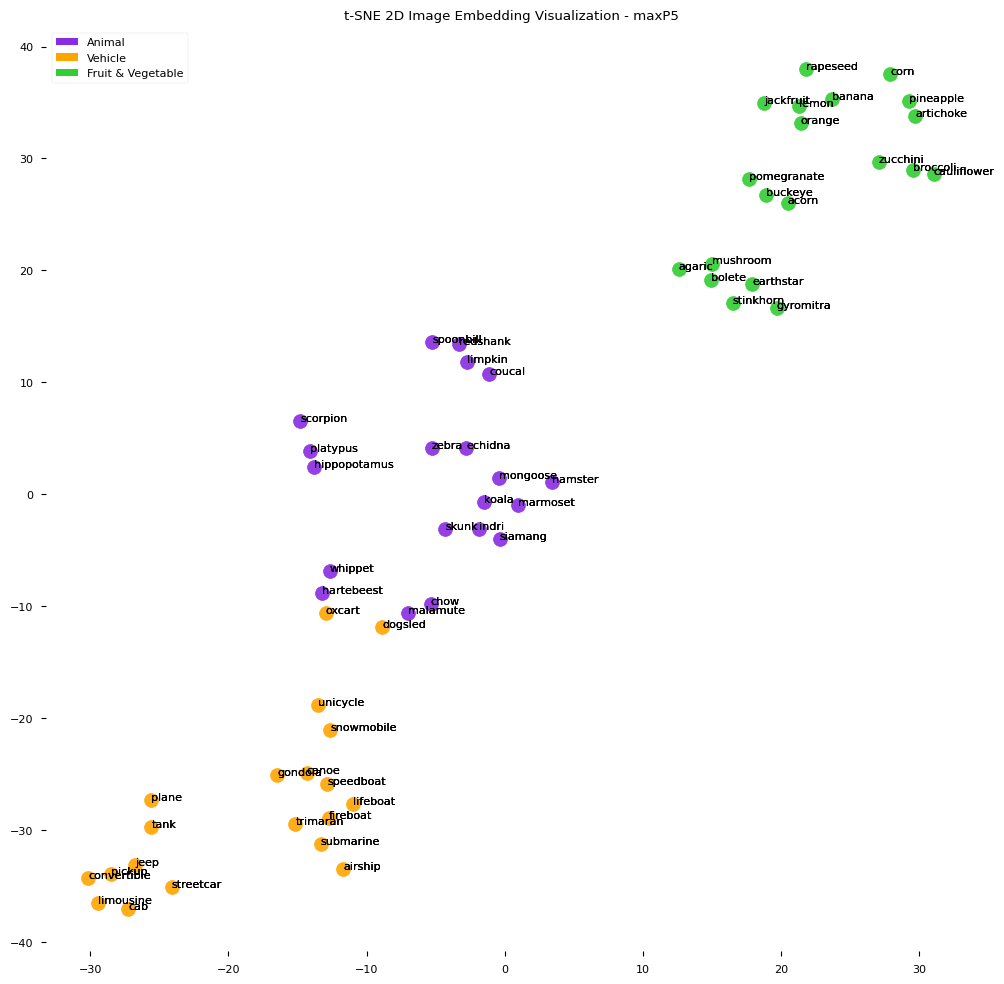

In [53]:
plot_tsne(combined_mp5, "maxP5")

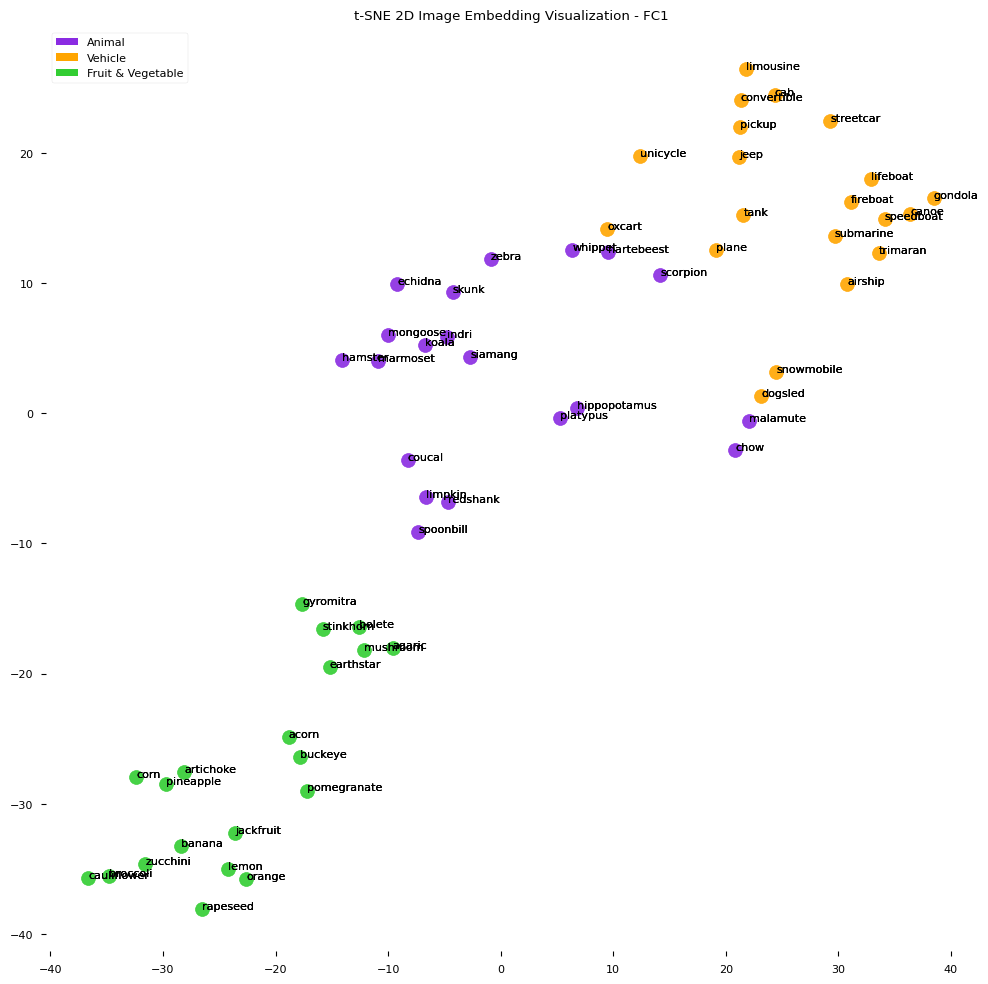

In [54]:
plot_tsne(combined_fc1, "FC1")